In [118]:
%matplotlib inline

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import *
from IPython.display import display, Math, Latex

In [120]:
def analysis_file(path, count):
    file_df = pd.read_csv(path, header=0, names=['data'], nrows=count)
    analysis_df(file_df)
    
def analysis_df(df):
    df.plot(kind='line')
    plt.show()
    data = df['data'].values
    plt.plot(data[:-1], data[1:], marker='o', color='r', ls='')
    plt.show()

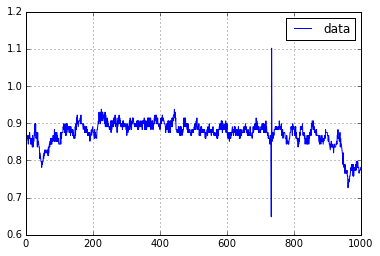

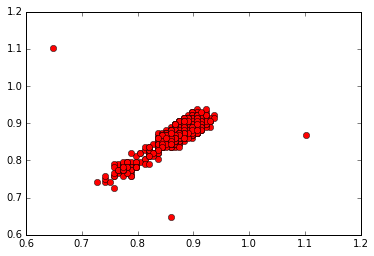

In [121]:
analysis_file('./Додаткові матеріали/rr.atr.00.txt', 1000)

#### Функція Вейерштраса

$ C(x,N) = \sum\limits_{n=-N}^N \cfrac{1-\cos (b^n x)}{b^{a\cdot n}} $

$ CC(x,N) = \sum\limits_{n=-N}^N \cfrac{\cos (b^n x)}{b^{a\cdot n}} $

##### Константи 

$ 
\begin{eqnarray}
b &=& 1.5 \\ 
a &=& 0.1 \\
N &=& 70 \\
x &=& \{0, 0.0001, \ldots , 1\} 
\end{eqnarray}
$

In [122]:
b = 1.5
a = 0.1
DEF_N = 70

def wei_c(x, N):
    result = 0
    for n in np.arange(-N, N+1):
        result += (1-cos((b**n) * x ))/(b ** (a*n))
    return result

def wei_cc(x, N):
    result = 0
    for n in np.arange(-N, N+1):
        result += (cos((b**n) * x))/(b ** (a*n))
    return result

In [135]:
def calculate_l_j(df, j):
    index = df.index
    data = df['data'].values
    count = DEF_N//j 
    result = 0
    for n in np.arange(1,count):
        result += sqrt((data[n] - data[n-1]) ** 2 + (index[n] - index[n-1]) ** 2)
    return result

def calculate_beta(df, j):
    l_j = calculate_l_j(df, j)
    index = df.index
    delta_t_j = (index[-1]-index[0])*j/DEF_N
    return -log(l_j)/log(delta_t_j)

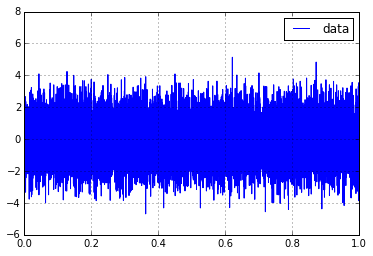

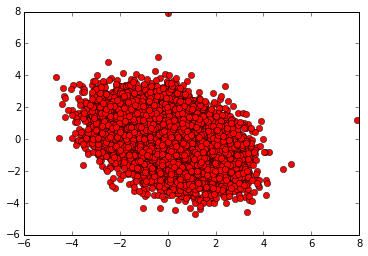

<IPython.core.display.Math object>

In [137]:
x = np.arange(0, 1.0001,0.0001)
prev = 0
wei_data = []
for i in np.arange(0, len(x)):
    result = wei_c(x[i],DEF_N)
    wei_data.append(result - prev)
    prev = result
# wei_df = pd.DataFrame(data=map(lambda x: wei_c(x, DEF_N), x), index=x, columns=['data'])
wei_df = pd.DataFrame(data=wei_data, index=x, columns=['data'])
analysis_df(wei_df)
display(Math(r'\beta_%d = %f' % (2, calculate_beta(wei_df, 2))))

#### Додаткові функції Вейерштраса

$F_1(x,N) = \cfrac{C(3x\cdot b, N)}{(3\cdot b)^a}$

$F_2(x,N) = \cfrac{C(x, N)}{C(0.5 x \cdot b, N)}$

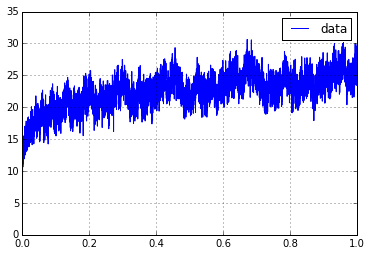

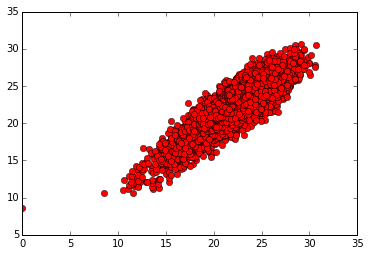

In [125]:
wei_add_df_1 = pd.DataFrame(data=map(lambda x: wei_c(3*x*b, DEF_N)/((3*b) ** a), x), index=x, columns=['data'])
analysis_df(wei_add_df_1)

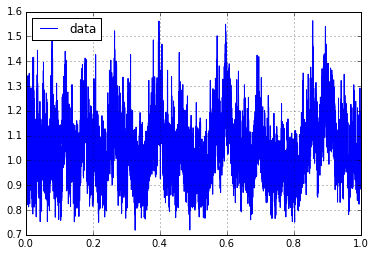

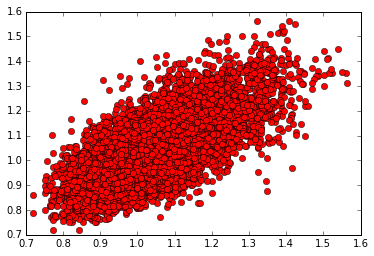

In [126]:
x_without_zero = x[1:]
wei_add_df_2 = pd.DataFrame(data=map(lambda x: wei_c(x, DEF_N)/wei_c(0.5*x*b, DEF_N), x_without_zero), index=x_without_zero, columns=['data'])
analysis_df(wei_add_df_2)

In [131]:
log(5)

1.6094379124341003

<function math.sqrt>